Import files

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/2023 Stats.csv')
print(df.head())

df1 = pd.read_csv('/content/drive/MyDrive/Case Closure.csv')
#print(df1.head())

  Date  Open Balances  Closed  New Cases
0  1/1           3315       5        345
1  2/1           3655      14        588
2  3/1           4229     501        867
3  4/1           4348     526        819
4  5/1           4621     531        778


In [2]:
# Drop unnamed columns and rows
df1 = df1.loc[:, ~df1.columns.str.contains('^Unnamed')]
df1 = df1.dropna()
print(df1)

             Date  Avg Case Closed Per CSE  Avg Case Closed Per CSA  \
0     2-Oct (Sun)                      0.0                      0.0   
1     3-Oct (Mon)                     28.0                      0.0   
2     4-Oct (Tue)                     28.0                      0.0   
3     5-Oct (Wed)                     28.0                      0.0   
4     6-Oct (Thu)                     28.0                      0.0   
..            ...                      ...                      ...   
482  27 Jan (Sat)                      0.0                      0.0   
483  28 Jan (Sun)                      6.0                      0.0   
484  29 Jan (Mon)                     29.0                     23.0   
485  30 Jan (Tue)                     26.0                     20.0   
486  31 Jan (Wed)                     24.0                     22.0   

     Avg Case Closed Per TL  Avg Case Closed per Temp  \
0                       0.0                       0.0   
1                       0.0      

In [3]:
#Grouping data into months
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m')
df['Date'] = df['Date'].apply(lambda x: x.replace(year=2022))
df['Month'] = df['Date'].dt.month
grouped_data_months = df.groupby('Month')

In [4]:
#Grpuping data into weeks
df['Week'] = df['Date'].dt.to_period('W-MON')
grouped_data_week = df.groupby('Week')

for week, group in grouped_data_week:
    group['Day of Week'] = group['Date'].dt.dayofweek

In [17]:
# Generate a date range from October 2, 2022, to January 5, 2024
date_range = pd.date_range(start='2022-10-02', end='2024-01-31', freq='D')

# Create a DataFrame with the date range
df_new_dates = pd.DataFrame({'Date': date_range})

# Truncate df1 to match the length of df_new_dates
df1_truncated = df1.head(len(df_new_dates))

# Replace the 'Date' column in df1 with the new date range
df1_truncated['Date'] = df_new_dates['Date'].values

df1_truncated['Date'] = pd.to_datetime(df1_truncated['Date'])

print(df1_truncated)

          Date  Avg Case Closed Per CSE  Avg Case Closed Per CSA  \
0   2022-10-02                      0.0                      0.0   
1   2022-10-03                     28.0                      0.0   
2   2022-10-04                     28.0                      0.0   
3   2022-10-05                     28.0                      0.0   
4   2022-10-06                     28.0                      0.0   
..         ...                      ...                      ...   
482 2024-01-27                      0.0                      0.0   
483 2024-01-28                      6.0                      0.0   
484 2024-01-29                     29.0                     23.0   
485 2024-01-30                     26.0                     20.0   
486 2024-01-31                     24.0                     22.0   

     Avg Case Closed Per TL  Avg Case Closed per Temp  \
0                       0.0                       0.0   
1                       0.0                       0.0   
2           

In [8]:
#df1 group month
df1_truncated['Month'] = df1_truncated['Date'].dt.month
grouped_data_months = df1_truncated.groupby('Month')

<ipython-input-8-13ffa6f0f327>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_truncated['Month'] = df1_truncated['Date'].dt.month


In [9]:
#df1 group week
df1_truncated['Week'] = df1_truncated['Date'].dt.to_period('W-MON')
grouped_data_week = df1_truncated.groupby('Week')

for week, group in grouped_data_week:
    group['Day of Week'] = group['Date'].dt.dayofweek

<ipython-input-9-124db012cfcd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_truncated['Week'] = df1_truncated['Date'].dt.to_period('W-MON')


In [10]:
print(df1)

             Date  Avg Case Closed Per CSE  Avg Case Closed Per CSA  \
0     2-Oct (Sun)                      0.0                      0.0   
1     3-Oct (Mon)                     28.0                      0.0   
2     4-Oct (Tue)                     28.0                      0.0   
3     5-Oct (Wed)                     28.0                      0.0   
4     6-Oct (Thu)                     28.0                      0.0   
..            ...                      ...                      ...   
482  27 Jan (Sat)                      0.0                      0.0   
483  28 Jan (Sun)                      6.0                      0.0   
484  29 Jan (Mon)                     29.0                     23.0   
485  30 Jan (Tue)                     26.0                     20.0   
486  31 Jan (Wed)                     24.0                     22.0   

     Avg Case Closed Per TL  Avg Case Closed per Temp  \
0                       0.0                       0.0   
1                       0.0      

In [11]:
filtered_df = df[df['Month'] == df.loc[1, 'Month']]
print(filtered_df)

         Date  Open Balances  Closed  New Cases  Month                   Week
0  2022-01-01           3315       5        345      1  2021-12-28/2022-01-03
1  2022-01-02           3655      14        588      1  2021-12-28/2022-01-03
2  2022-01-03           4229     501        867      1  2021-12-28/2022-01-03
3  2022-01-04           4348     526        819      1  2022-01-04/2022-01-10
4  2022-01-05           4621     531        778      1  2022-01-04/2022-01-10
5  2022-01-06           4762     527        686      1  2022-01-04/2022-01-10
6  2022-01-07           4921     389        289      1  2022-01-04/2022-01-10
7  2022-01-08           4821     301        258      1  2022-01-04/2022-01-10
8  2022-01-09           4466     654        662      1  2022-01-04/2022-01-10
9  2022-01-10           4422     854        655      1  2022-01-04/2022-01-10
10 2022-01-11           3959     733        698      1  2022-01-11/2022-01-17
11 2022-01-12           3803     671        661      1  2022-01-

<ipython-input-13-2ab3aa254a65>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.loc[:, 'Date'] = pd.to_datetime(filtered_df['Date'])
<ipython-input-13-2ab3aa254a65>:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  filtered_df.loc[:, 'Date'] = pd.to_datetime(filtered_df['Date'])


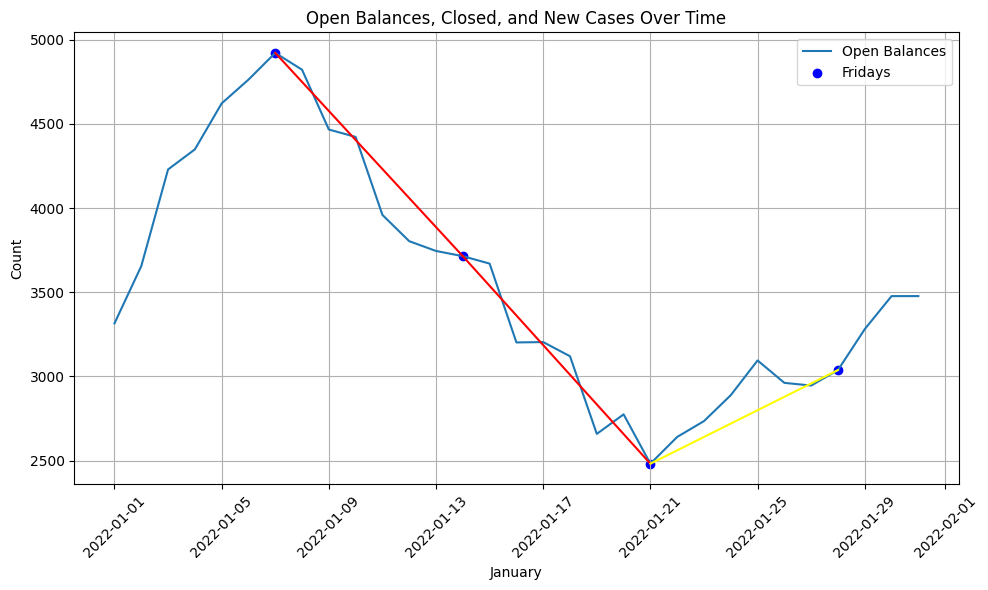

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Assuming 'Date' column is in datetime format
filtered_df.loc[:, 'Date'] = pd.to_datetime(filtered_df['Date'])

# Filter for Fridays
friday_df = filtered_df[filtered_df['Date'].dt.dayofweek == 4]

# Plot Open Balances
plt.plot(filtered_df['Date'], filtered_df['Open Balances'], label='Open Balances')

# Plot Fridays
plt.scatter(friday_df['Date'], friday_df['Open Balances'], color='blue', label='Fridays', marker='o')

# Iterate over each day
for index, row in filtered_df.iterrows():
    # Skip if it's not Friday
    if row['Date'].dayofweek != 4:
        continue

    # Get the date of the Friday before
    previous_friday = row['Date'] - pd.Timedelta(days=7)

    # Get the open balance for the Friday before
    previous_friday_open_balance = filtered_df[filtered_df['Date'] == previous_friday]['Open Balances'].values

    # If the previous Friday's open balance exists and is greater than 3500, plot in red
    if len(previous_friday_open_balance) > 0 and previous_friday_open_balance[0] > 3500:
        plt.plot([previous_friday, row['Date']], [previous_friday_open_balance[0], row['Open Balances']], color='red')
    # If the previous Friday's open balance exists and is between 2000 and 3500, plot in yellow
    elif len(previous_friday_open_balance) > 0 and 2000 <= previous_friday_open_balance[0] <= 3500:
        plt.plot([previous_friday, row['Date']], [previous_friday_open_balance[0], row['Open Balances']], color='yellow')
    # If the previous Friday's open balance exists and is below 2000, plot in green
    elif len(previous_friday_open_balance) > 0 and previous_friday_open_balance[0] < 2000:
        plt.plot([previous_friday, row['Date']], [previous_friday_open_balance[0], row['Open Balances']], color='green')

# Add labels and title
plt.xlabel('January')
plt.ylabel('Count')
plt.title('Open Balances, Closed, and New Cases Over Time')

# Add legend
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-16-81ded8ec747f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Date'] = pd.to_datetime(filtered_df['Date'])


ValueError: 3315 is not a valid value for color

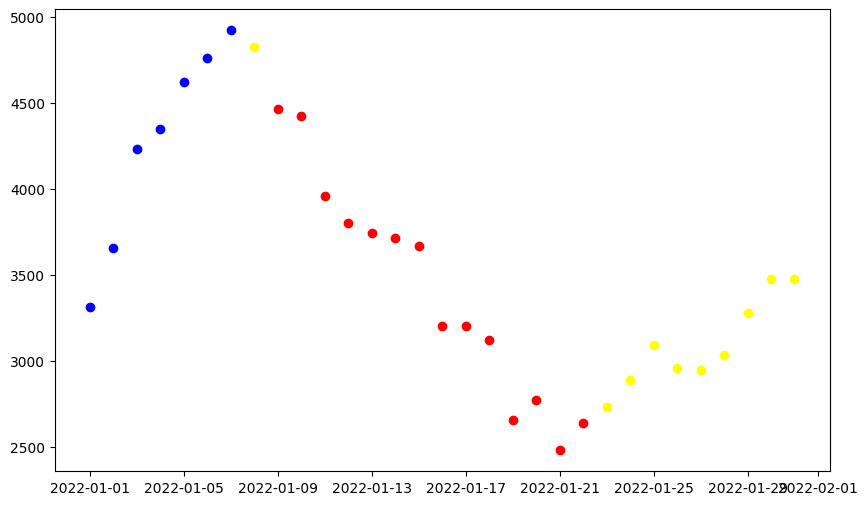

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'Date' column is in datetime format
filtered_df['Date'] = pd.to_datetime(filtered_df['Date'])

plt.figure(figsize=(10, 6))

# Iterate over each row in filtered_df
for index, row in filtered_df.iterrows():
    # Get the date of the Friday before
    previous_friday = row['Date'] - pd.Timedelta(days=7)

    # Get the open balance for the Friday before
    previous_friday_open_balance = filtered_df[filtered_df['Date'] == previous_friday]['Open Balances'].values

    # Determine the color for the current point based on the open balance of the previous Friday
    color = ''
    if len(previous_friday_open_balance) > 0 and previous_friday_open_balance[0] > 3500:
        color = 'red'
    elif len(previous_friday_open_balance) > 0 and 2000 <= previous_friday_open_balance[0] <= 3500:
        color = 'yellow'
    elif len(previous_friday_open_balance) > 0 and previous_friday_open_balance[0] < 2000:
        color = 'green'
    else:
        color = 'blue'

    # Plot the current point with the determined color
    plt.plot(row['Date'], row['Open Balances'], marker='o', color=color)

# Separate the data into segments based on the color
segments = []
current_segment = []
prev_color = None
for index, row in filtered_df.iterrows():
    previous_friday = row['Date'] - pd.Timedelta(days=7)
    previous_friday_open_balance = filtered_df[filtered_df['Date'] == previous_friday]['Open Balances'].values
    color = ''
    if len(previous_friday_open_balance) > 0 and previous_friday_open_balance[0] > 3500:
        color = 'red'
    elif len(previous_friday_open_balance) > 0 and 2000 <= previous_friday_open_balance[0] <= 3500:
        color = 'yellow'
    elif len(previous_friday_open_balance) > 0 and previous_friday_open_balance[0] < 2000:
        color = 'green'
    else:
        color = 'blue'
    if prev_color != color:
        if current_segment:
            segments.append(current_segment)
            current_segment = []
    current_segment.append((row['Date'], row['Open Balances']))
    prev_color = color
if current_segment:
    segments.append(current_segment)

# Plot lines connecting the points within each segment
for segment in segments:
    dates, open_balances = zip(*segment)
    color = segment[0][1]  # Get the color of the segment
    plt.plot(dates, open_balances, color=color, alpha=0.5)

# Plot Closed Cases
plt.plot(filtered_df['Date'], filtered_df['Closed'], label='Closed Cases', marker='o')

# Plot New Cases
plt.plot(filtered_df['Date'], filtered_df['New Cases'], label='New Cases', marker='o')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Open Balances, Closed, and New Cases Over Time')

# Add legend
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()
